# Fourier Analysis


In [6]:
# importing packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav   # to read wav files
from scipy.fftpack import fft, rfft, fftfreq # to do fft
from scipy import stats 

In [7]:
# getting audio from video files

#import
import subprocess

#creating commands
horn_c = "ffmpeg -i horn.mov -ab 160k -ac 2 -ar 44100 -vn horn-audio.wav"
bass_c = "ffmpeg -i bass.mov -ab 160k -ac 2 -ar 44100 -vn bass-audio.wav"
guitar_c = "ffmpeg -i guitar.mp4 -ab 160k -ac 2 -ar 44100 -vn guitar-audio.wav"



In [8]:
#running commands
#for c in [horn_c, bass_c]:
subprocess.call(guitar_c, shell=True)

/bin/sh: ffmpeg: command not found


127

# Example: Guitar Note
Let's look at an example of how we can use the Fourier transform to analyze an audio file. We'll use an audio recording of a guitarist plucking a note. We begin by importing the audio file as a .wav, then extract the audio data from the wav file. We can then perform the Fast Fourier Transform on the audio data to convert into into the frequency domain. Note that here, we use the real FFT in order to compute only the real components of the FFT. 

In [38]:
# setting file name
file = 'guitar-audio.wav'

#getting the sound data from the file
rate, data = wav.read(file)

# performing the fft 
fft_data = rfft(data.T[0])                      # performing real fft on the left channel only (since file is stereo)

Once we've computed the FFT for the audio file, we can convert this data into decibels. Using the sample rate, we can set the corresponding frequencies for each of the magnitudes calculated from the FFT.

In [39]:
# Compute the magnitude spectrum (in dB) of the FFT
mag_points = 20*np.log10(np.abs(fft_data))

# Generate the frequency values corresponding to the FFT coefficients
n = len(data)
freqs = np.arange(n) * (rate / n)
freqs_points = freqs

Here, we look for the maximum magnitude to attempt to identify the note being played by the guitar. 

In [40]:
# getting max of freq (identifies highest magnitude frequency)
magmodei = list(mag_points).index(max(mag_points))  #gets index of max
freqmode = freqs_points[magmodei]                   #gets corresponding frequency

freqmode

415.9420975768066

It looks like 415.94 is the most prominent frequency in the audio file. This is a G sharp!

Lets look at the waveform for the audio file. 

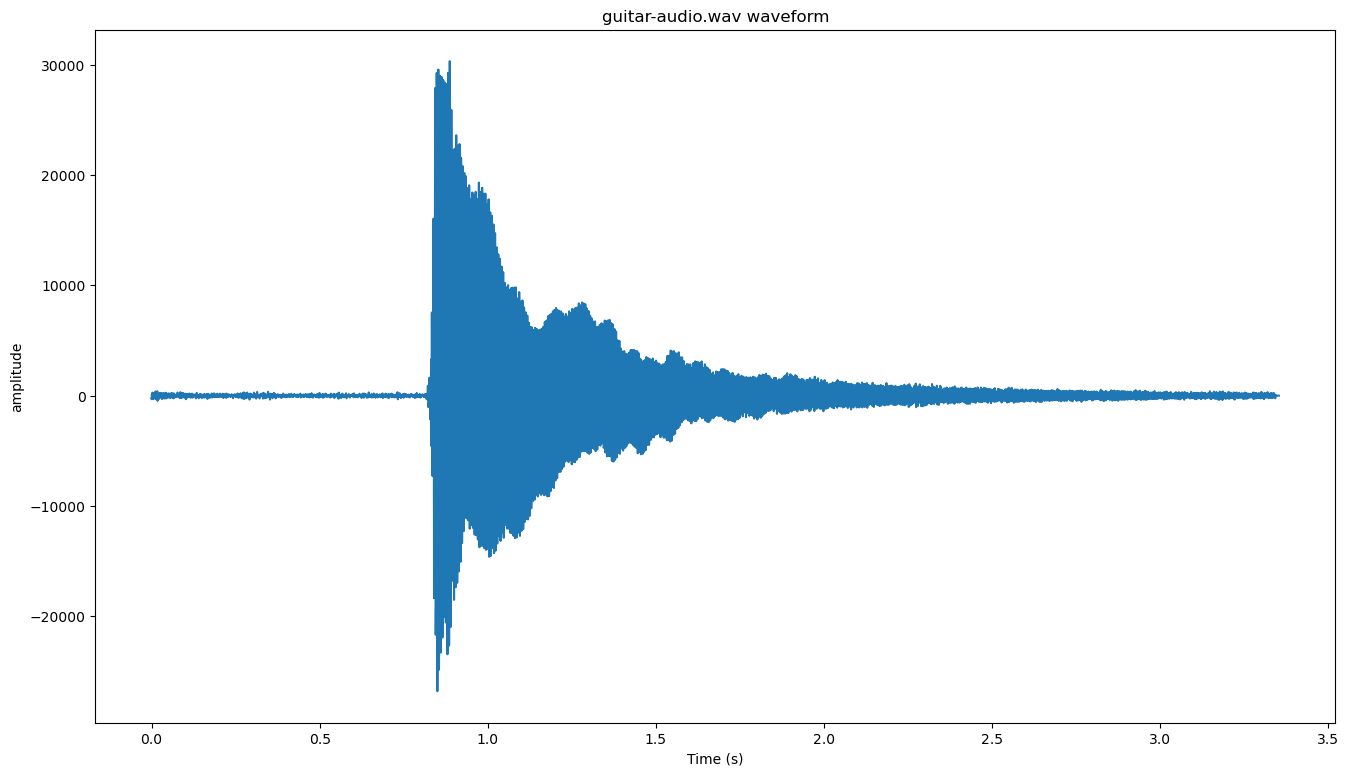

In [41]:
#plotting the waveform
length = data.shape[0] / rate
time = np.linspace(0, length, data.shape[0])
plt.figure(figsize=(16, 9))
plt.title(file+' waveform')
plt.plot(time, data[:,0])
plt.xlabel('Time (s)')
plt.ylabel('amplitude')
plt.show()

Here's the spectrum of the audio file, with the loudest frequency indicated by the line.

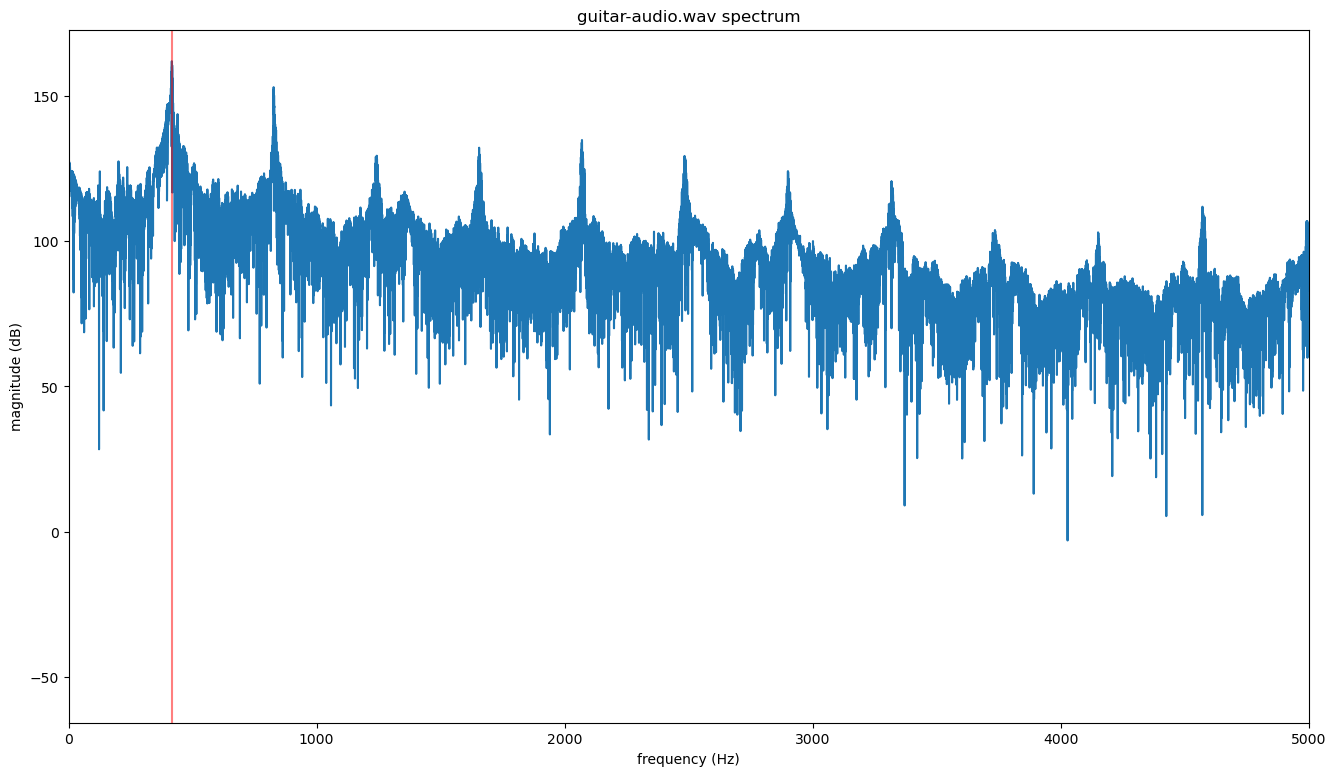

In [43]:
# plotting the spectrum of the sound file
plt.figure(figsize=(16, 9))
plt.plot(freqs_points, mag_points )
plt.title(file+' spectrum')
plt.xlabel('frequency (Hz)')  
plt.ylabel('magnitude (dB)')
plt.axvline(x = freqmode, color='r', alpha = 0.5)
plt.xlim(0,5000)
plt.show()

And here is the spectrogram of the audio file with the highest frequency highlighted again. 

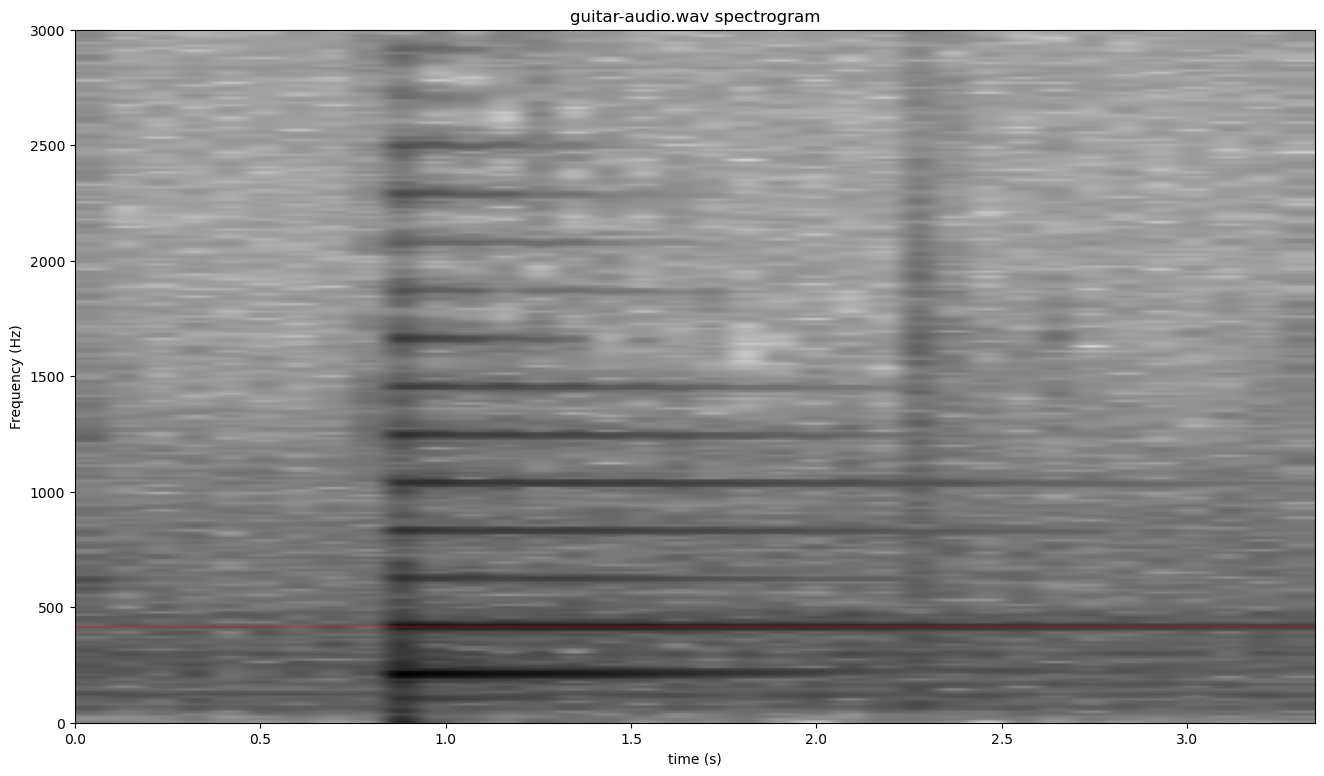

In [45]:
# plotting the spectrogram of the data
plt.figure(figsize=(16, 9))
plt.specgram(data.T[0], NFFT=4096, Fs=rate, noverlap=0, cmap='gist_yarg')

#titles
plt.title(file+' spectrogram')
plt.xlabel('time (s)')
plt.ylabel('Frequency (Hz)')

#plotting loudest frequency
plt.axhline(y = freqmode, color = 'r', alpha = 0.3)

#limiting to interesting part
plt.ylim(0, 3000)


plt.show()

# Example: Spectrogram/Gabor Transform (Short Time Fourier Transform) 
To explore the usefulness of the Gabor transform, this time we will examine an audio file of the well-known *Fur Elise* piano bagatelle by Ludvig van Beethoven (1770-1827), performed by Peter Bradley-Fulgoni.

In [58]:
# setting file name
file = 'fur-elise-bradley-fulgoni.wav'

#getting the sound data from the file
b_rate, b_data = wav.read(file) 

/var/folders/3t/5nn86tfs0y585pp70pbs5_lc0000gn/T/ipykernel_17200/4207221171.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  b_rate, b_data = wav.read(file)


In [59]:
# setting up plotting notes
E = [82, 165, 330, 660]
Dsharp = [622]
D = [587]
C = [262, 523]
B = [494 ]
A = [110, 220, 440]
Gsharp = [208, 415]


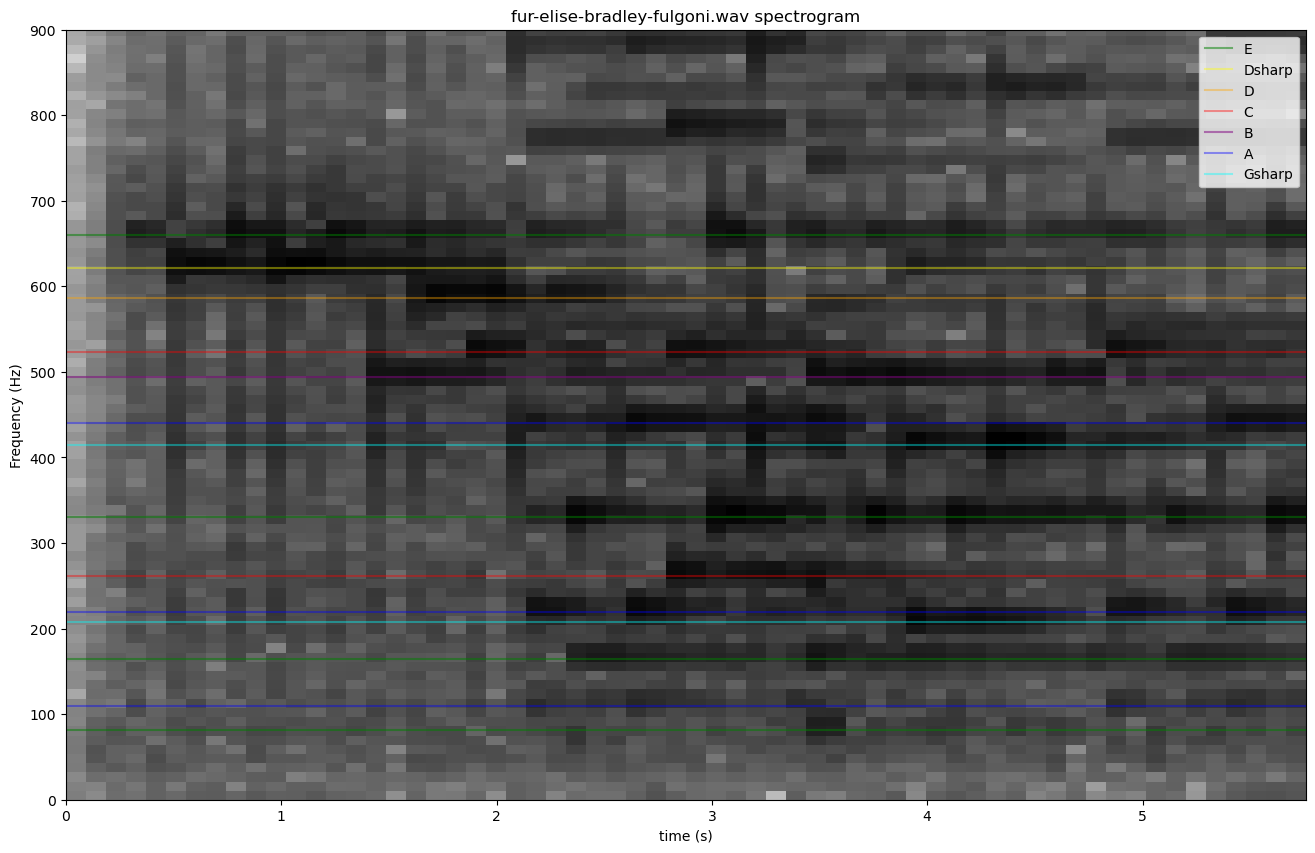

In [70]:
# plotting the spectrogram of the data
plt.figure(figsize=(16, 10))
plt.specgram(b_data.T[0], NFFT=4096, Fs=rate, noverlap=0, cmap='gist_yarg')

#titles
x = [1, 2, 3, 4, 5]
plt.title(file+' spectrogram')
plt.xlabel('time (s)')
plt.ylabel('Frequency (Hz)')

#limiting y axis to interesting part
plt.ylim(0, 900)

#horizontal lines for notes
plt.axhline(y = E[0], color = 'green', alpha = 0.5, label = 'E')
for e in E[1:]:
    plt.axhline(y = e, color = 'green', alpha = 0.5)
plt.axhline(y = Dsharp, color = 'yellow', alpha = 0.4, label = 'Dsharp')
plt.axhline(y = D, color = 'orange', alpha = 0.4, label = 'D')
plt.axhline(y = C[0], color = 'red', alpha = 0.4, label = 'C')
plt.axhline(y = C[1], color = 'red', alpha = 0.4)
plt.axhline(y = B, color = 'purple', alpha = 0.5, label = 'B')
plt.axhline(y = A[0], color = 'blue', alpha = 0.4, label = 'A')
for a in A[1:]:
    plt.axhline(y = a, color = 'blue', alpha = 0.4)
plt.axhline(y = Gsharp[0], color = 'aqua', alpha = 0.4, label = 'Gsharp')
plt.axhline(y = Gsharp[1], color = 'aqua', alpha = 0.4)

plt.legend()
plt.show()